In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
import plotly.plotly as py
import numpy as np

In [8]:
test = pd.read_csv('crime-w.csv')
test = test[test.isnull().sum(1)==0].loc[lambda df: np.logical_and(df['Longitude'] >= -88, df['Latitude'] >= 41.6)]
test.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,bound-0.00100,bound-0.00050,bound-0.00010,bound-0.00005
0,10404989,HZ141222,02/05/2016 11:35:00 AM,049XX W HUBBARD ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,...,1902559.0,2016,02/12/2016 03:59:22 PM,41.888659,-87.748942,"(41.888658688, -87.748941709)",True,False,False,False
2,10404991,HZ141303,02/05/2016 12:20:00 PM,003XX S HALSTED ST,0820,THEFT,$500 AND UNDER,OTHER,True,False,...,1898568.0,2016,02/12/2016 03:59:22 PM,41.877144,-87.647217,"(41.877143695, -87.64721684)",True,True,False,False
3,10404994,HZ141244,02/05/2016 11:09:00 AM,053XX N FOREST GLEN AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),STREET,True,False,...,1935140.0,2016,02/12/2016 03:59:22 PM,41.978100,-87.755168,"(41.978099798, -87.755167509)",True,True,False,False
5,10404995,HZ141208,02/05/2016 11:30:00 AM,082XX S ELLIS AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1850557.0,2016,02/12/2016 03:59:22 PM,41.745098,-87.600159,"(41.745097591, -87.600159412)",False,False,False,False
6,10404996,HZ141360,02/05/2016 01:15:00 PM,016XX N MAYFIELD AVE,501A,OTHER OFFENSE,ANIMAL ABUSE/NEGLECT,RESIDENTIAL YARD (FRONT/BACK),False,False,...,1910389.0,2016,02/12/2016 03:59:22 PM,41.910265,-87.772742,"(41.910264753, -87.772742112)",False,False,False,False


In [9]:
distance = [0.001, 0.0005, 0.0001, 0.00005]
boundTitle = list(map(lambda x: 'bound-%.5f' % x, distance))
print(boundTitle)

['bound-0.00100', 'bound-0.00050', 'bound-0.00010', 'bound-0.00005']


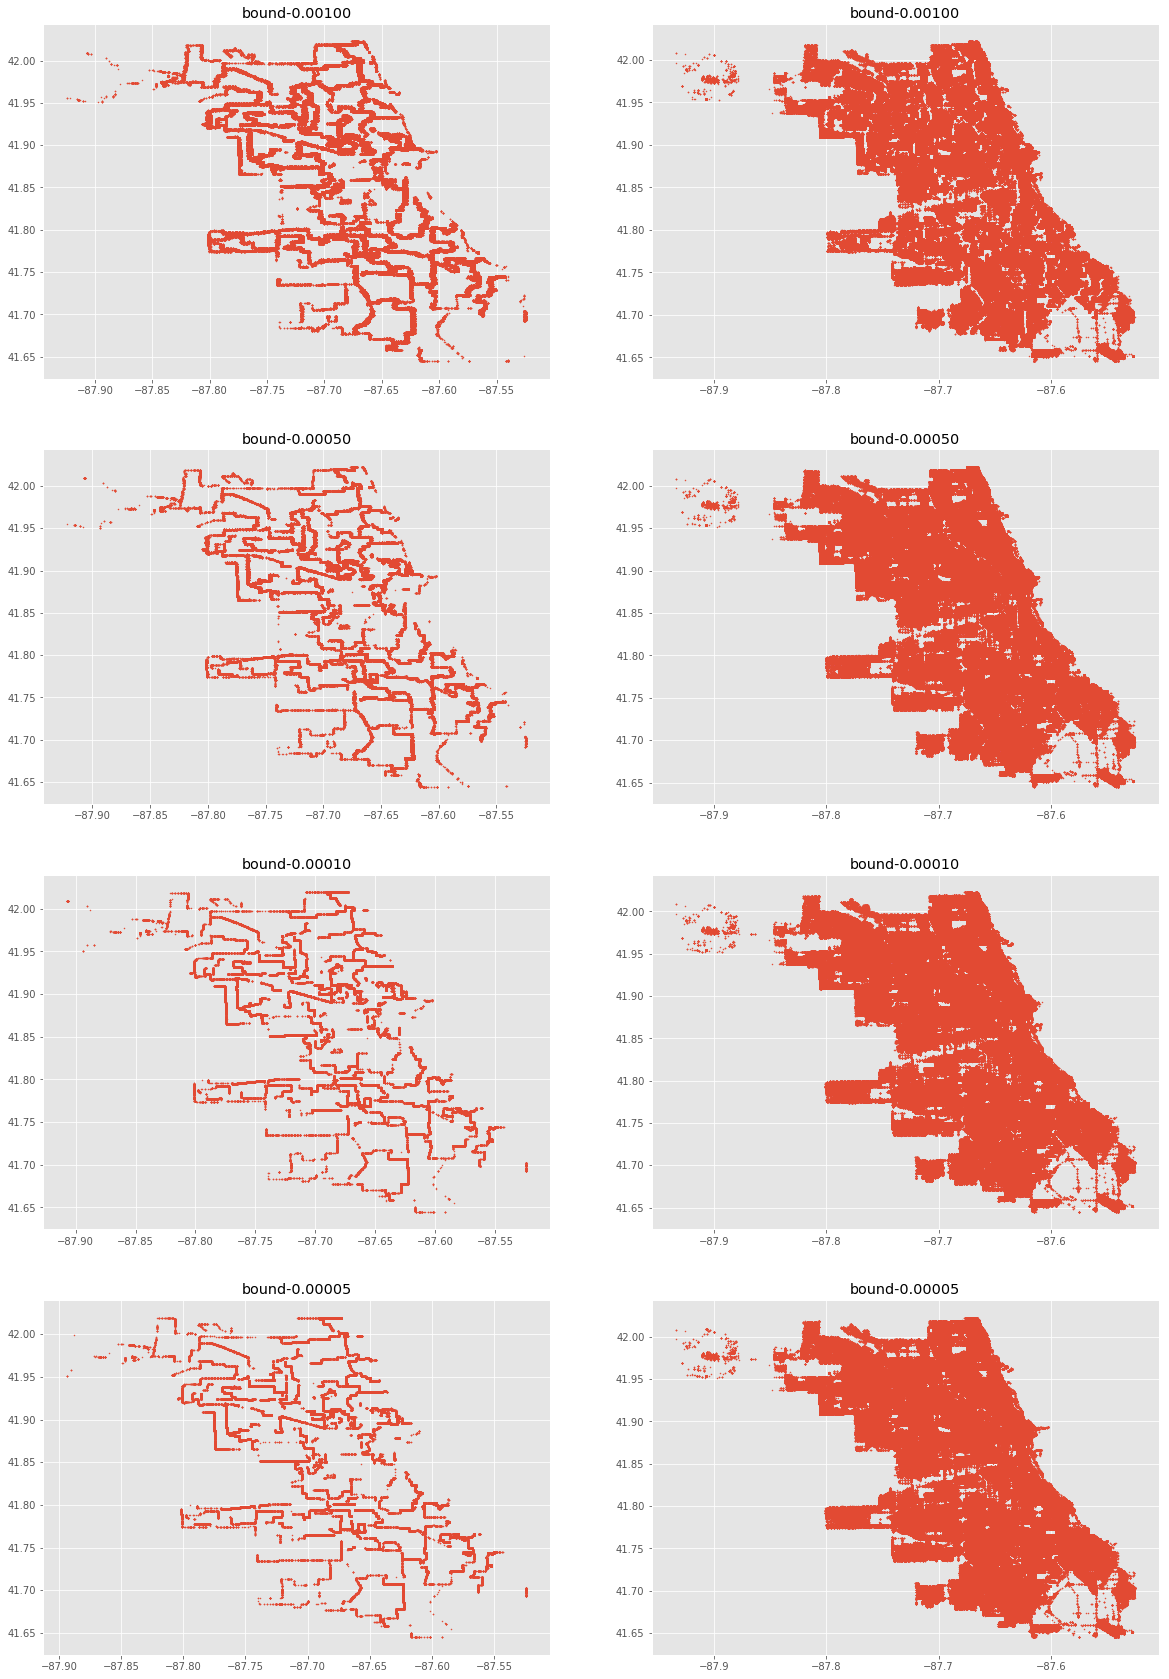

In [11]:
Row = len(distance)
Col = 2

fig, axes = plt.subplots(nrows=Row, ncols=Col, figsize=(20, 30))

for i in range(len(boundTitle)):
    isBorder = test.loc[lambda df: df[boundTitle[i]]]
    x = np.array(isBorder[['Longitude']]).reshape(1, -1)[0]
    y = np.array(isBorder[['Latitude']]).reshape(1, -1)[0]
    axes[i,0].scatter(x,y,1)
    axes[i,0].set_title(boundTitle[i])

    notBorder = test.loc[lambda df: df[boundTitle[i]] == False]
    x = np.array(notBorder[['Longitude']]).reshape(1, -1)[0]
    y = np.array(notBorder[['Latitude']]).reshape(1, -1)[0]
    axes[i,1].scatter(x,y,1)
    axes[i,1].set_title(boundTitle[i])

In [13]:
title = ['all'] + boundTitle

border = [test] + list(map(lambda title: test.loc[lambda df: df[title]], boundTitle))
lt = len(test)
data = []
for i in range(len(border)):
    b = border[i]
    lb = len(b)
    lba = len(b.loc[lambda df: df['Arrest']])
    lbua = lb - lba
    data.append([title[i], lb, lb / lt * 100, lba, lba / lb * 100, lbua, lbua / lb * 100])
    
data = pd.DataFrame(data)
data.columns = ['Area', 'all (#)', 'all (%)', 'arrest (#)', 'arrest (%)', 'unarrest (#)', 'unarrest (%)']

print(data)

            Area  all (#)     all (%)  arrest (#)  arrest (%)  unarrest (#)  \
0            all  5621195  100.000000     1584684   28.191230       4036511   
1  bound-0.00100  1306832   23.248295      375811   28.757407        931021   
2  bound-0.00050   678081   12.062933      206419   30.441643        471662   
3  bound-0.00010   397862    7.077890      121241   30.473129        276621   
4  bound-0.00005   392457    6.981736      120066   30.593415        272391   

   unarrest (%)  
0     71.808770  
1     71.242593  
2     69.558357  
3     69.526871  
4     69.406585  


In [15]:
plt.subplots_adjust(wspace = 30)
Row = 5
Col = 7

allcrime = [[], [], [], [], []]
label = []
for a in range(len(test['Primary Type'].value_counts().index)):
    crimeClass = test['Primary Type'].value_counts().index[a]
    label.append(crimeClass)
    
    for i in range(len(border)):
        d = border[i].loc[lambda df: df['Primary Type'] == crimeClass]
        dua = d.loc[lambda df: df['Arrest']  == False]
        if len(d) == 0:
            allcrime[i].append(0)
        else: 
            allcrime[i].append(len(dua) / len(d) * 100)

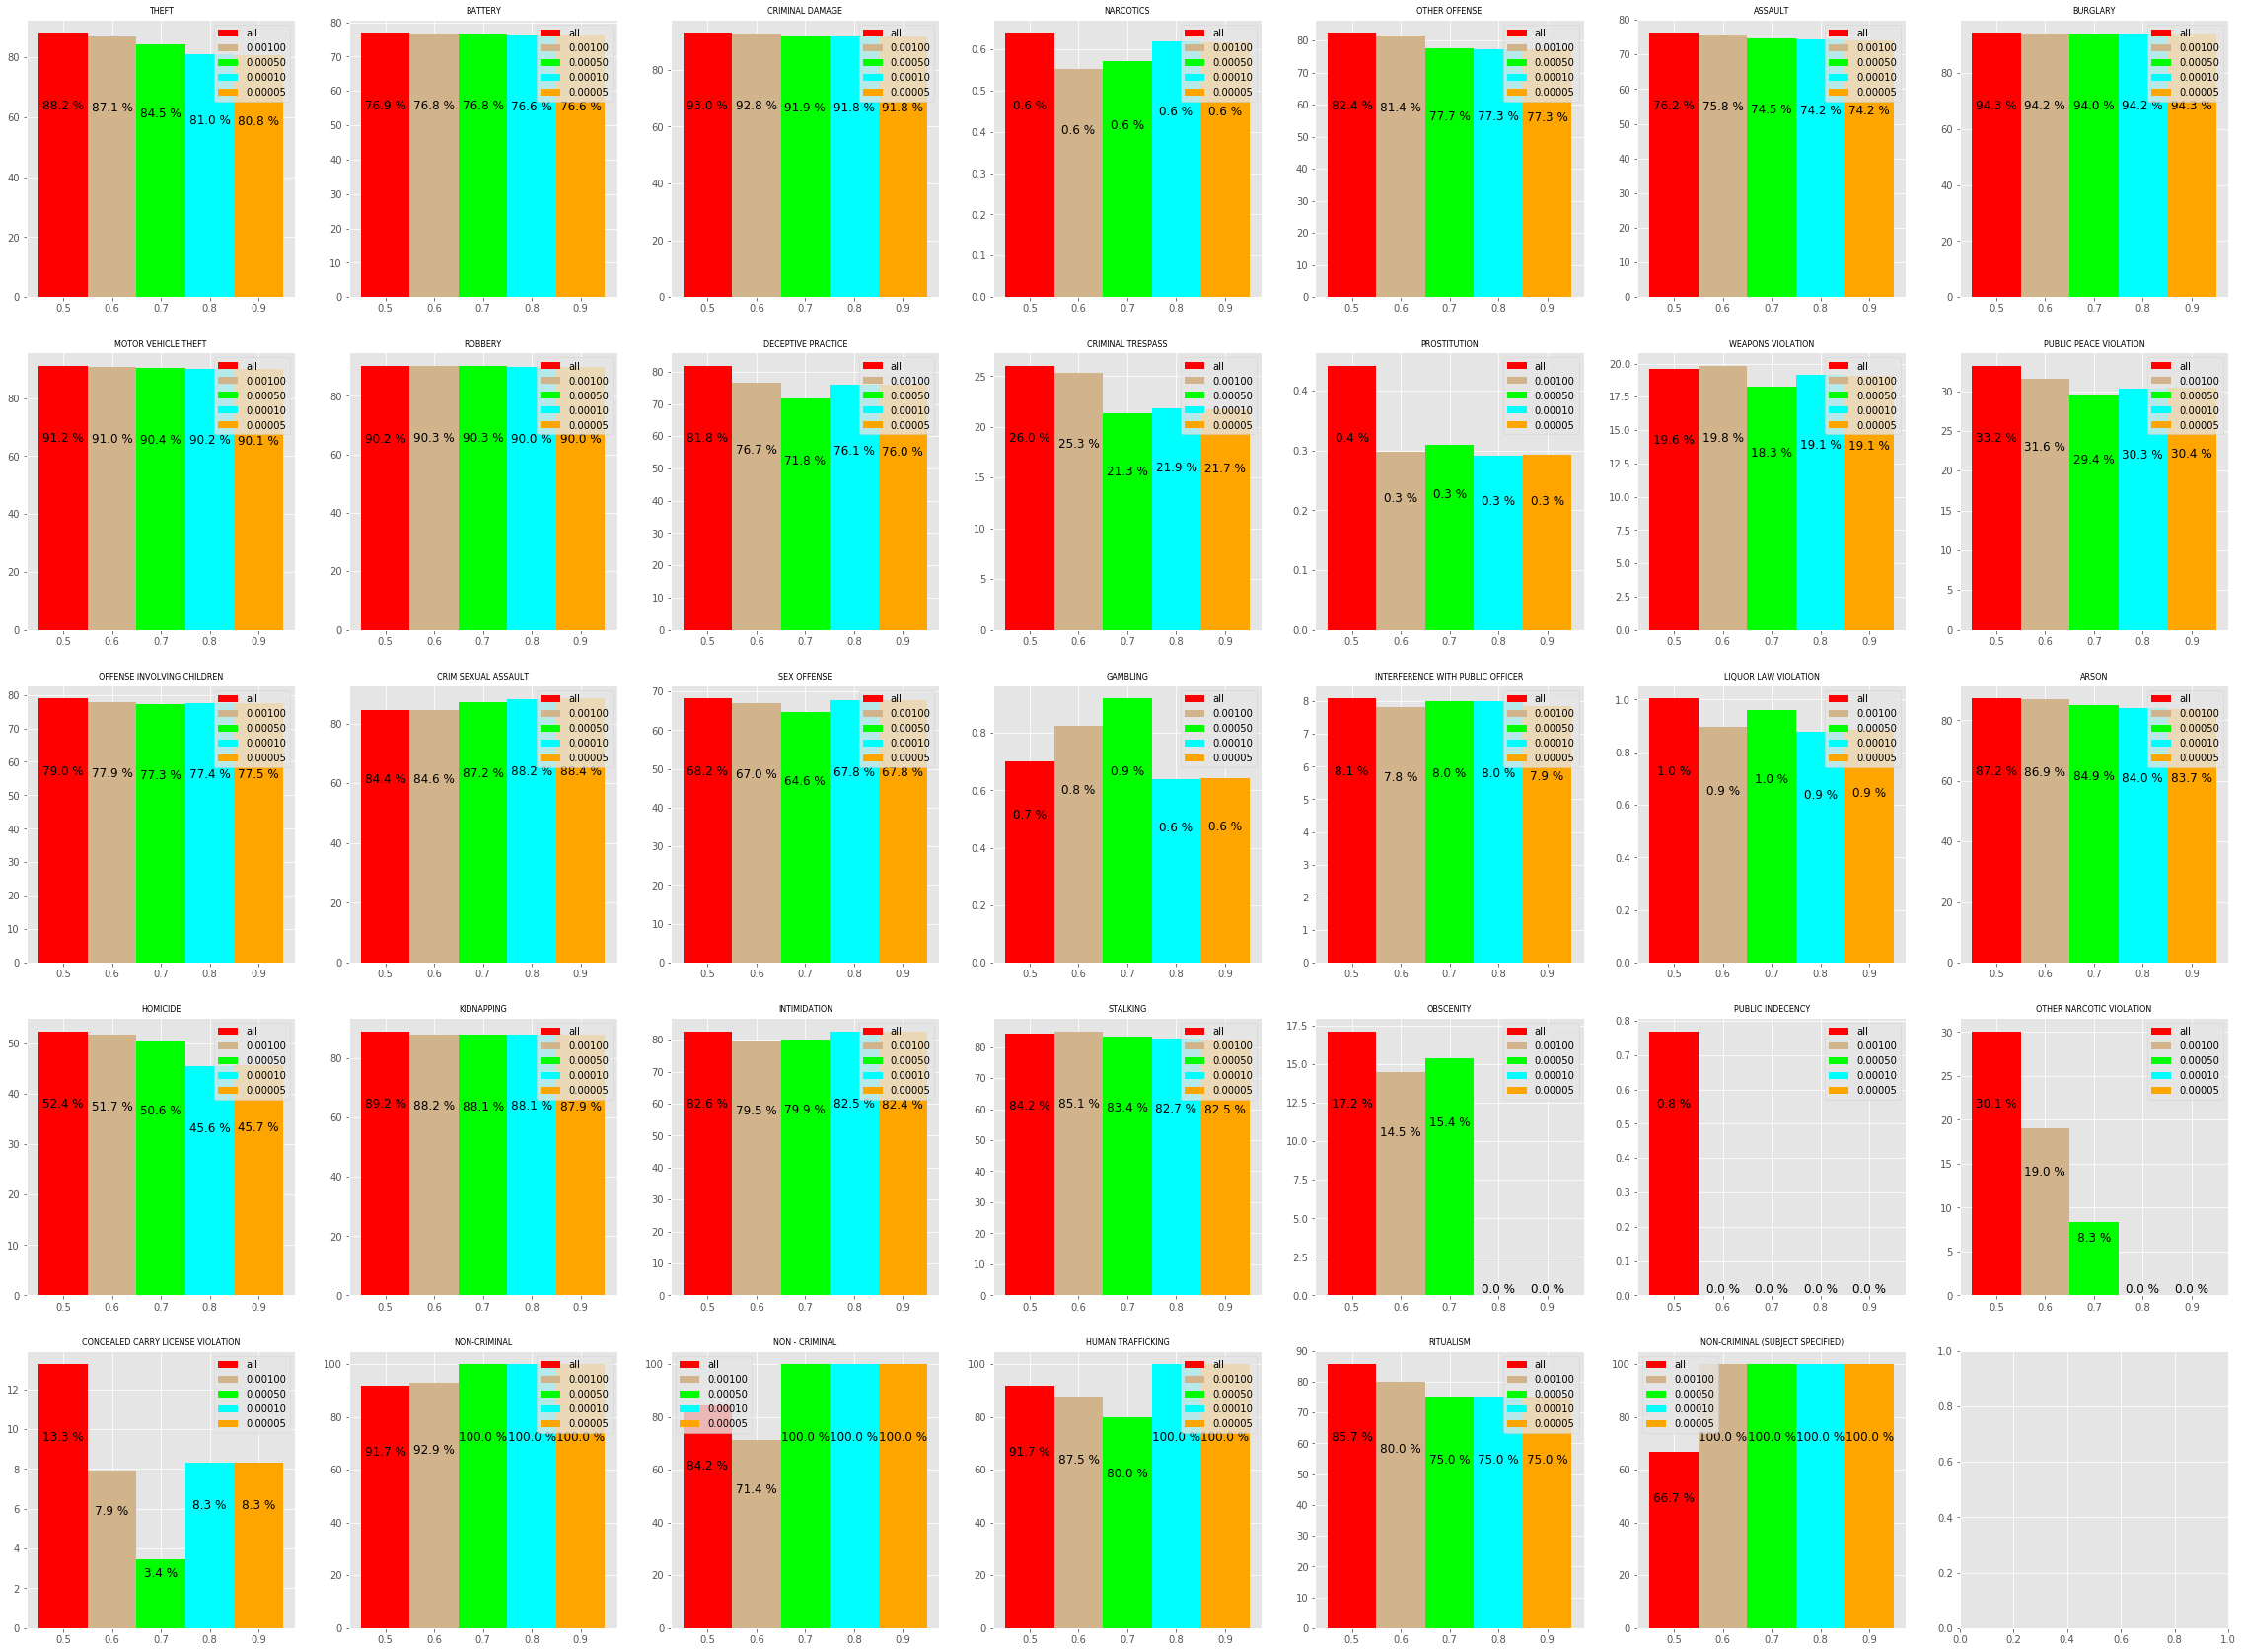

In [17]:
width = 0.1
color = ['red', 'tan', 'lime', 'cyan', 'orange']
fig, axes = plt.subplots(nrows=Row, ncols=Col, figsize=(40, 30))

trimTitle = [t if 'bound' not in t else t.split('-')[1] for t in title]

def autolabel(rects, subplot):
    for rect in rects:
        height = rect.get_height()
        subplot.text(rect.get_x() + rect.get_width() / 2., 0.7 * height,
                '%.1f %%' % float(height),
                ha='center', va='bottom', fontsize = 12)

for i in range(len(label)):
    rect = []
    for j in range(len(trimTitle)):
        rect.append(axes[int(i/Col),i%Col].bar(0.5 + width * j, [allcrime[j][i]], width, color=color[j]))
    
    axes[int(i/Col),i%Col].legend([i[0] for i in rect], trimTitle)
    axes[int(i/Col),i%Col].set_title(label[i], fontsize=8)
    
    for r in rect:
        autolabel(r, axes[int(i/Col),i%Col])